# Sales Analysis

---
## Table of contents:

- [Introduction](#intro)
- [1. Importing necessary libraries](#import)
- [2. Gathering data](#gather)
- [3. Assessing data](#assess)
- [4. Cleaning data](#clean)
- [5. Storing cleaned data](#store) 
- [6. Analyze and Visualization](#analyze-visaulize) 

---
<a id='intro'></a>
## Introduction:

Using Python, Pandas & Matplotlib to analyze and answer business questions about 12 months worth of sales data.<br> 
The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

---
<a id='import'></a>
## 1. Importing necessary libraries

In [1]:
# import libraries
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
<a id='gather'></a>
## 2. Gathering data

**All sales data are provided to us in a CSV format.**

In [16]:
os.listdir('data')

NameError: name 'os' is not defined

---
## 3. Assessing data

In [3]:
# exploring data
df_jan = pd.read_csv('./data/Sales_January_2019.csv')
df_feb = pd.read_csv('./data/Sales_February_2019.csv')
df_mar = pd.read_csv('./data/Sales_March_2019.csv')
df_apr = pd.read_csv('./data/Sales_April_2019.csv')
df_may = pd.read_csv('./data/Sales_May_2019.csv')
df_jun = pd.read_csv('./data/Sales_June_2019.csv')
df_jul = pd.read_csv('./data/Sales_July_2019.csv')
df_aug = pd.read_csv('./data/Sales_August_2019.csv')
df_sep = pd.read_csv('./data/Sales_September_2019.csv')
df_oct = pd.read_csv('./data/Sales_October_2019.csv')
df_nov = pd.read_csv('./data/Sales_November_2019.csv')
df_dec = pd.read_csv('./data/Sales_December_2019.csv')


In [4]:
df_jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
df_jan.

In [5]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


In [6]:
df_jan.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               9697
True      True     True              True        True        True                  26
Name: count, dtype: int64

In [7]:
print(f"Jan: {df_jan.shape}")
print(f"Feb: {df_feb.shape}")
print(f"Mar: {df_mar.shape}")
print(f"Apr: {df_apr.shape}")
print(f"May: {df_may.shape}")
print(f"Jun: {df_jun.shape}")
print(f"Jul: {df_jul.shape}")
print(f"Aug: {df_aug.shape}")
print(f"Sep: {df_sep.shape}")
print(f"Oct: {df_oct.shape}")
print(f"Nov: {df_nov.shape}")
print(f"Dec: {df_dec.shape}")

Jan: (9723, 6)
Feb: (12036, 6)
Mar: (15226, 6)
Apr: (18324, 6)
May: (16635, 6)
Jun: (13622, 6)
Jul: (14371, 6)
Aug: (12011, 6)
Sep: (11686, 6)
Oct: (20379, 6)
Nov: (17661, 6)
Dec: (25117, 6)


### Assessment Summary

**Quality issues**
Erroneous datatypes:
- `Quantity Ordered` should be `int`.
- `Price Each` should be `float`.
- `Order Date` should be `datetime`.
- In columns names: Replace space with underscore `_` for easy usage. (Optional)
- Missing Values

**Tidiness issues**
- All sales data from the 12 months should be merged into one dataset.
- `Total Price` column should be added.
- Extact/Create other columns from existing columns.

---
<a id='clean'></a>
## 4. Cleaning data

**First we merge the datasets to clean it one time**

**Code**

In [8]:
df_all = pd.DataFrame()

for file in os.listdir('./data/'):
    df_temp = pd.read_csv('./data/'+file)
    df_all = pd.concat([df_all, df_temp])
    
df_all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


**It is a good practice to work on copies in cleaning stage**

In [19]:
# copy
df_all_clean = df_all.copy()

NameError: name 'df_all' is not defined

**1. Remove `NaN` values**

**Define**
- Drop `NaN` values

In [10]:
df_all_clean.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
True      True     True              True        True        True                   486
Name: count, dtype: int64

**Code**

In [11]:
df_all_clean.dropna(inplace=True)

**Test**

In [12]:
df_all_clean.shape

(186305, 6)

In [13]:
df_all_clean.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
Name: count, dtype: int64

**2. Rename the columns**


**Define**
- Rename the columns to a lower case and replace the white space with an underscore to easy usage

**Code**

In [14]:
df_all_clean.rename(columns=lambda x: x.lower().replace(' ','_'), inplace=True)

**Test**

In [15]:
for column in df_all_clean.columns:
    print(column) 

order_id
product
quantity_ordered
price_each
order_date
purchase_address


**3. Erroneous datatypes: Quantity Ordered & Price Each Should be `float`**

In [16]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**Define**
- Convert `Quantity Ordered` & `Price Each` to `float` using `astype()`

**Code**

In [17]:
df_all_clean.quantity_ordered.value_counts()

quantity_ordered
1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: count, dtype: int64

**4. Remove `"Order ID	Product	Quantity Ordered	Price Each	Order Date	Purchase Addres"` rows** 

In [18]:
df_all_clean.query('quantity_ordered == "Quantity Ordered"')

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
df_all_clean.drop(df_all_clean.index[df_all_clean.quantity_ordered == "Quantity Ordered"], inplace = True)

**Test**

In [20]:
df_all_clean.query('quantity_ordered == "Quantity Ordered"')

,order_id,product,quantity_ordered,price_each,order_date,purchase_address


**5. Convert the data type**

**Code**

In [21]:
df_all_clean.quantity_ordered = df_all_clean.quantity_ordered.astype(int)
df_all_clean.price_each = df_all_clean.price_each.astype(float)

In [22]:
df_all_clean.order_date = pd.to_datetime(df_all_clean.order_date)

C:\Users\hp\AppData\Local\Temp\ipykernel_6824\1633882341.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all_clean.order_date = pd.to_datetime(df_all_clean.order_date)


**Test**

In [24]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182732 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          182732 non-null  object        
 1   product           182732 non-null  object        
 2   quantity_ordered  182732 non-null  int32         
 3   price_each        182732 non-null  float64       
 4   order_date        182732 non-null  datetime64[ns]
 5   purchase_address  182732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.1+ MB


**6. Create `month` column from `order_date`**

**Define**
- Create `month` column from `order_date` column using `month_name()` function

**Code**

In [25]:
df_all_clean['month'] = df_all_clean.order_date.dt.month_name()

**Test**

In [26]:
df_all_clean.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


**7. Create `total_sales` column**

**Define**
- Create `total_sales` column
- `total_price = quantity_ordered * price_each`

**Code**

In [22]:
df_all_clean['total_sales'] = df_all_clean.quantity_ordered * df_all_clean.price_each

NameError: name 'df_all_clean' is not defined

**Test**

In [28]:
df_all_clean.sample(5)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales
4557,198418,Bose SoundSport Headphones,1,99.99,2019-05-30 15:45:00,"959 Chestnut St, San Francisco, CA 94016",May,99.99
6455,242860,20in Monitor,1,109.99,2019-08-21 11:11:00,"683 Sunset St, San Francisco, CA 94016",August,109.99
8408,217942,Apple Airpods Headphones,1,150.00,2019-06-02 12:50:00,"722 Lakeview St, Boston, MA 02215",June,150.00
4219,252205,Wired Headphones,1,11.99,2019-09-11 16:43:00,"339 10th St, San Francisco, CA 94016",September,11.99
1242,249348,Bose SoundSport Headphones,1,99.99,2019-09-13 11:28:00,"761 River St, New York City, NY 10001",September,99.99


**8. Create `city` column**

**Define**
- Extact city name from purchase_address using regular expression

In [29]:
df_all_clean.sample(10)['purchase_address']

7221        848 Wilson St, San Francisco, CA 94016
5782                192 14th St, Atlanta, GA 30301
8854        930 Walnut St, San Francisco, CA 94016
7583                  192 4th St, Boston, MA 02215
356      106 Jefferson St, San Francisco, CA 94016
14125       892 Meadow St, New York City, NY 10001
8582                   85 6th St, Austin, TX 73301
8189            606 Hickory St, Portland, OR 97035
6419            279 11th St, Los Angeles, CA 90001
11784           550 Hickory St, Portland, OR 97035
Name: purchase_address, dtype: object

**Code**

In [30]:
# test
test_pattern = re.compile(r'(?:St,\s)(\w+\s?\w+\s?\w+\s?,\s\w+)')

test_text1 = "23 Johnson St, Atlanta, GA 30301"
test_text2 = "854 Adams St, New York City, NY 10001"
test_text3 = "315 Cedar St, Los Angeles, CA 90001"

resutl1 = re.findall(test_pattern, test_text1)
resutl2 = re.findall(test_pattern, test_text2)
resutl3 = re.findall(test_pattern, test_text3)

print(resutl1, resutl2, resutl3)

['Atlanta, GA'] ['New York City, NY'] ['Los Angeles, CA']


In [31]:
pattern = r'(?:St,\s)(\w+\s?\w+\s?\w+\s?,\s\w+)'
df_all_clean['city'] = df_all_clean.purchase_address.str.extract(pattern)

**Test**

In [32]:
df_all_clean.sample(20)[['purchase_address', 'city']]

,purchase_address,city
6255,"793 West St, Dallas, TX 75001","Dallas, TX"
177,"583 Adams St, Los Angeles, CA 90001","Los Angeles, CA"
4893,"415 14th St, Seattle, WA 98101","Seattle, WA"
11194,"511 Park St, New York City, NY 10001","New York City, NY"
694,"755 Adams St, Seattle, WA 98101","Seattle, WA"
10826,"254 North St, New York City, NY 10001","New York City, NY"
19978,"946 Lincoln St, New York City, NY 10001","New York City, NY"
757,"10 4th St, Seattle, WA 98101","Seattle, WA"
3232,"591 12th St, San Francisco, CA 94016","San Francisco, CA"
4699,"346 6th St, New York City, NY 10001","New York City, NY"


**Another way**
Use `apply()` method on df_all.purchase_address with `lambda`
```
df_all['city'] = df_all.purchase_address.apply(lambda x: x.split(',')[1])
```

**9. Create `hour` column**

**Define**
- Extract time from `order_date` column using `datetime.dt.hour`

In [33]:
df_all_clean['hour'] = df_all_clean.order_date.dt.hour

**Test**

In [34]:
df_all_clean.sample(10)[['order_date', 'hour']]

,order_date,hour
10065,2019-07-09 21:12:00,21
8740,2019-06-26 14:23:00,14
14113,2019-10-15 21:08:00,21
3438,2019-09-02 11:03:00,11
8785,2019-03-16 11:22:00,11
10924,2019-04-21 17:09:00,17
9591,2019-10-05 00:34:00,0
11091,2019-04-22 19:31:00,19
17562,2019-12-21 15:40:00,15
1881,2019-05-24 12:06:00,12


---
<a id='store'></a>
## 5. Storing cleaned data

In [35]:
df_all_clean.to_csv('./all_data_master.csv', index=False)

In [36]:
# load cleaned csv file
df = pd.read_csv('./all_data_master.csv')
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,"Dallas, TX",8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,"Boston, MA",22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",9


In [37]:
# fixing order_date type
df.order_date = pd.to_datetime(df.order_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182732 entries, 0 to 182731
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          182732 non-null  int64         
 1   product           182732 non-null  object        
 2   quantity_ordered  182732 non-null  int64         
 3   price_each        182732 non-null  float64       
 4   order_date        182732 non-null  datetime64[ns]
 5   purchase_address  182732 non-null  object        
 6   month             182732 non-null  object        
 7   total_sales       182732 non-null  float64       
 8   city              182732 non-null  object        
 9   hour              182732 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 13.9+ MB


---
<a id='analyze-visaulize'></a>
## 6. Analyze and Visualization

**We are trying to answer these questions:**
1. What was the best month for sales? How much was earned that month?
2. What city sold the most product?
3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?
4. What products are most often sold together?
5. What product sold the most? Why do you think it sold the most?

---
### Q1: What was the best month for sales? How much was earned that month?

**We can answer this question by plotting bar chart between months and max sales.**

In [38]:
df.groupby('month').max().sort_values('total_sales', ascending=False)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,city,hour
month,,,,,,,,,
April,194094,iPhone,7,1700.0,2019-04-30 23:49:00,"999 Pine St, Boston, MA 02215",3400.00,"Seattle, WA",23
June,222909,iPhone,9,1700.0,2019-06-30 23:56:00,"999 Wilson St, San Francisco, CA 94016",3400.00,"Seattle, WA",23
May,209920,iPhone,7,1700.0,2019-05-31 23:49:00,"999 Wilson St, Portland, OR 97035",3400.00,"Seattle, WA",23
January,319366,iPhone,7,1700.0,2020-01-01 05:13:00,"999 Walnut St, San Francisco, CA 94016",1999.98,"Seattle, WA",23
October,278796,iPhone,8,1700.0,2019-10-31 23:51:00,"999 West St, Boston, MA 02215",1999.98,"Seattle, WA",23
August,248150,iPhone,8,1700.0,2019-08-31 23:57:00,"999 Sunset St, San Francisco, CA 94016",1700.00,"Seattle, WA",23
December,319670,iPhone,7,1700.0,2019-12-31 23:53:00,"999 West St, Los Angeles, CA 90001",1700.00,"Seattle, WA",23
February,162008,iPhone,7,1700.0,2019-02-28 23:59:00,"999 Wilson St, New York City, NY 10001",1700.00,"Seattle, WA",23
July,236669,iPhone,9,1700.0,2019-07-31 23:43:00,"999 Willow St, Seattle, WA 98101",1700.00,"Seattle, WA",23


In [39]:
# Reordering months
months_sales = df.groupby('month').max().sort_values('total_sales', ascending=False)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_sales.index  = pd.CategoricalIndex(months_sales.index, categories=months, ordered=True)
months_sales = months_sales.sort_index()
months_sales

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,city,hour
month,,,,,,,,,
January,319366,iPhone,7,1700.0,2020-01-01 05:13:00,"999 Walnut St, San Francisco, CA 94016",1999.98,"Seattle, WA",23
February,162008,iPhone,7,1700.0,2019-02-28 23:59:00,"999 Wilson St, New York City, NY 10001",1700.00,"Seattle, WA",23
March,176557,iPhone,7,1700.0,2019-03-31 23:46:00,"999 Sunset St, Los Angeles, CA 90001",1700.00,"Seattle, WA",23
April,194094,iPhone,7,1700.0,2019-04-30 23:49:00,"999 Pine St, Boston, MA 02215",3400.00,"Seattle, WA",23
May,209920,iPhone,7,1700.0,2019-05-31 23:49:00,"999 Wilson St, Portland, OR 97035",3400.00,"Seattle, WA",23
June,222909,iPhone,9,1700.0,2019-06-30 23:56:00,"999 Wilson St, San Francisco, CA 94016",3400.00,"Seattle, WA",23
July,236669,iPhone,9,1700.0,2019-07-31 23:43:00,"999 Willow St, Seattle, WA 98101",1700.00,"Seattle, WA",23
August,248150,iPhone,8,1700.0,2019-08-31 23:57:00,"999 Sunset St, San Francisco, CA 94016",1700.00,"Seattle, WA",23
September,259357,iPhone,6,1700.0,2019-09-30 23:59:00,"999 Wilson St, Los Angeles, CA 90001",1700.00,"Seattle, WA",23


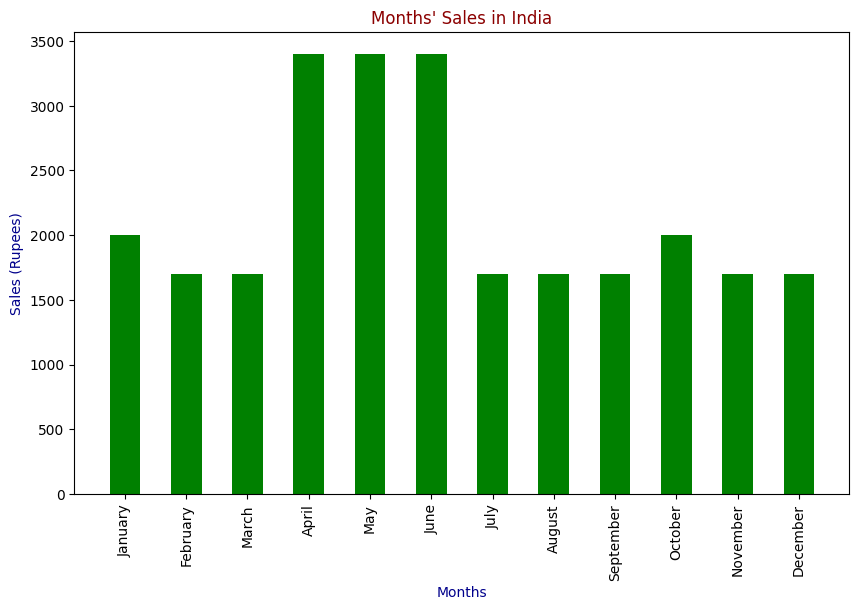

In [40]:
plt.style.use('default')
plt.figure(figsize=(10, 6))
plt.bar(months, months_sales.total_sales , width=.5, color='g')
plt.xticks(months, rotation='vertical')
plt.xlabel("Months", color='darkblue', size=10)
plt.ylabel("Sales (Rupees)", color='darkblue', size=10)
plt.title("Months' Sales in India", color='darkred', size=12)
plt.show()

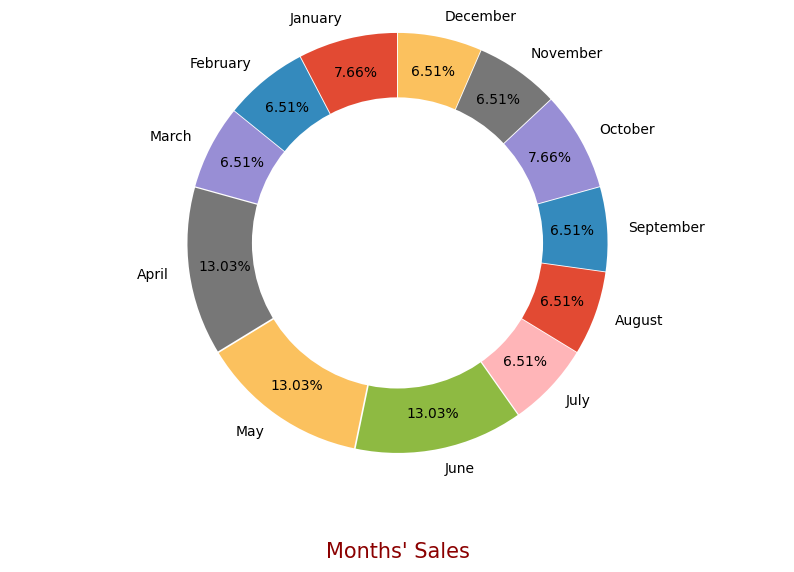

In [41]:
# Pie chart
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)


plt.pie(months_sales.total_sales, labels=months, explode=explode, autopct='%1.2f%%', startangle=90, pctdistance=0.83)
plt.axis('equal')

plt.title("Months' Sales", color='darkred', size=15, y=-.2)


#draw circle
centre_circle = plt.Circle((0,0),.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

**December was the best month for sales with 4.557905e+06 USD**

---
### Q2: What city sold the most product?

**We can answer this question by plotting bar chart between cities and min sales.**

In [42]:
df.groupby('city').min().sort_values('total_sales', ascending=False)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,hour
city,,,,,,,,,
"Atlanta, GA",141253,20in Monitor,1,2.99,2019-01-01 06:03:00,"1 11th St, Atlanta, GA 30301",April,2.99,0
"Austin, TX",141238,20in Monitor,1,2.99,2019-01-01 10:02:00,"1 1st St, Austin, TX 73301",April,2.99,0
"Boston, MA",141234,20in Monitor,1,2.99,2019-01-01 06:41:00,"1 4th St, Boston, MA 02215",April,2.99,0
"Dallas, TX",141266,20in Monitor,1,2.99,2019-01-01 05:53:00,"1 1st St, Dallas, TX 75001",April,2.99,0
"Los Angeles, CA",141237,20in Monitor,1,2.99,2019-01-01 07:48:00,"1 11th St, Los Angeles, CA 90001",April,2.99,0
"New York City, NY",141264,20in Monitor,1,2.99,2019-01-01 03:07:00,"1 12th St, New York City, NY 10001",April,2.99,0
"Portland, ME",141329,20in Monitor,1,2.99,2019-01-01 16:01:00,"1 8th St, Portland, ME 04101",April,2.99,0
"Portland, OR",141235,20in Monitor,1,2.99,2019-01-01 07:53:00,"1 14th St, Portland, OR 97035",April,2.99,0
"San Francisco, CA",141236,20in Monitor,1,2.99,2019-01-01 03:40:00,"1 11th St, San Francisco, CA 94016",April,2.99,0


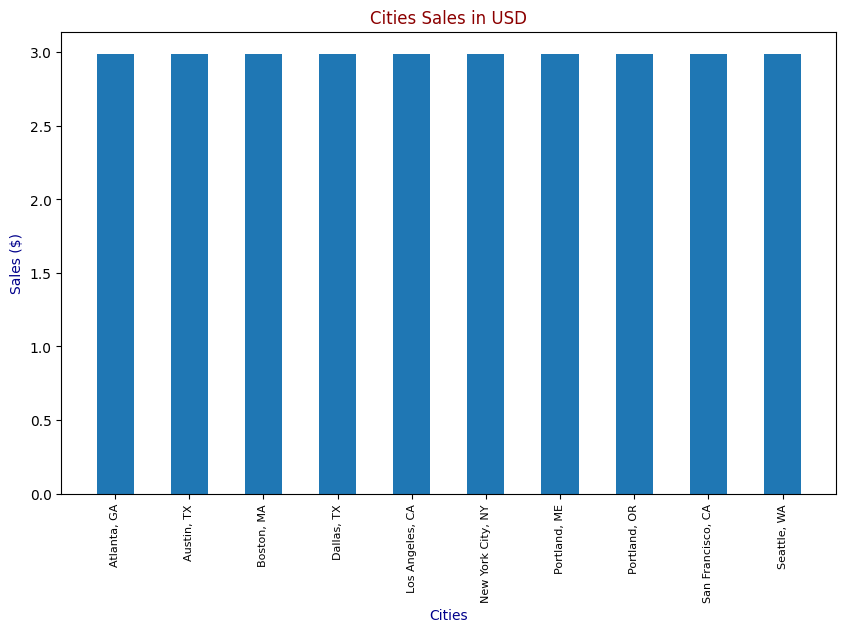

In [43]:
min_sales = df.groupby('city').min()
cities = [city for city, df in df.groupby('city')]

plt.figure(figsize=(10, 6))
plt.style.use('default')


plt.bar(cities, min_sales.total_sales, width=0.5)

plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel("Cities", color='darkblue', size=10)
plt.ylabel("Sales ($)", color='darkblue', size=10)
plt.title("Cities Sales in USD", color='darkred', size=12)
plt.show()

Text(0.5, -0.1, 'Cities Sales share')

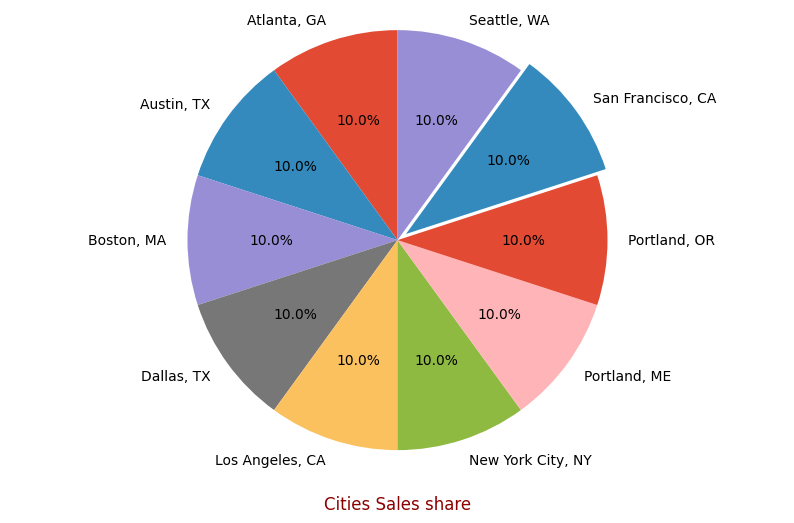

In [44]:
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.05, 0)
plt.pie(min_sales.total_sales, labels=cities, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title("Cities Sales share", color='darkred', size=12, y=-.1)

**San Francisco was the highest city in sales with 8.124121e+06 USD**

---
### Q3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

**We can answer this question by plotting line chart between day's hours and max sales.**

In [45]:
df.groupby('hour').max().sort_values('total_sales', ascending=False)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city
hour,,,,,,,,,
12,319667,iPhone,6,1700.0,2019-12-31 12:59:00,"999 Willow St, Seattle, WA 98101",September,3400.00,"Seattle, WA"
13,319657,iPhone,7,1700.0,2019-12-31 13:57:00,"999 Wilson St, Portland, OR 97035",September,3400.00,"Seattle, WA"
21,319670,iPhone,7,1700.0,2019-12-31 21:58:00,"999 Willow St, Seattle, WA 98101",September,3400.00,"Seattle, WA"
9,319646,iPhone,9,1700.0,2019-12-31 09:58:00,"999 Walnut St, Atlanta, GA 30301",September,3400.00,"Seattle, WA"
17,319660,iPhone,7,1700.0,2019-12-31 17:58:00,"999 West St, Los Angeles, CA 90001",September,1999.98,"Seattle, WA"
16,319634,iPhone,8,1700.0,2019-12-31 16:58:00,"999 Park St, San Francisco, CA 94016",September,1999.98,"Seattle, WA"
22,319651,iPhone,6,1700.0,2019-12-31 22:58:00,"999 Ridge St, New York City, NY 10001",September,1700.00,"Seattle, WA"
20,319666,iPhone,8,1700.0,2019-12-31 20:58:00,"999 Willow St, Los Angeles, CA 90001",September,1700.00,"Seattle, WA"
19,319662,iPhone,8,1700.0,2019-12-31 19:57:00,"999 Wilson St, San Francisco, CA 94016",September,1700.00,"Seattle, WA"


Text(0.5, 1.0, "Sales over day's hours")

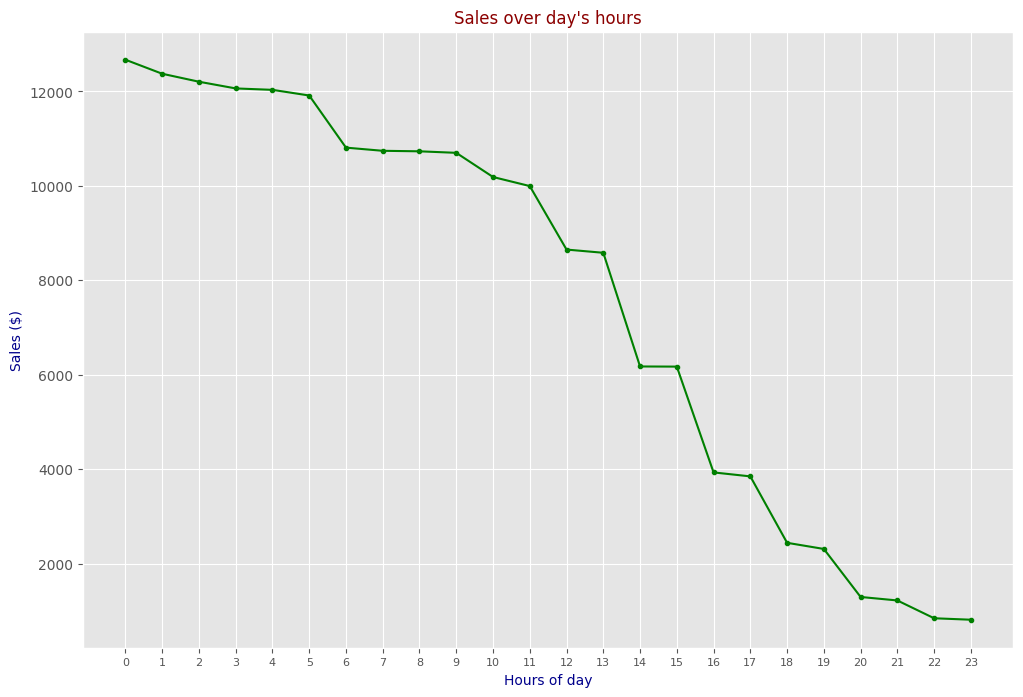

In [66]:
hour_sales = df.groupby('hour').count().sort_values('total_sales' , ascending=False)
hours = [hour for hour, df in df.groupby('hour')]
plt.figure(figsize=(12,8))

plt.plot(hours, hour_sales.total_sales, 'g.-')
plt.xticks(hours, size=8)
plt.xlabel("Hours of day", color='darkblue', size=10)
plt.ylabel("Sales ($)", color='darkblue', size=10)
plt.title("Sales over day's hours", color='darkred', size=12)

**Looks like we have two peaks, at 12:00 PM amd 7:00 PM, We should display more advertisement before these times.**

---
### Q4: What products are most often sold together?

**We can check `order_id`. If there are matched, that means they are the same order.**

In [46]:
# Check all duplicated order id
df_same_id = df[df.order_id.duplicated(keep=False)]
df_same_id.head(10)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,hour
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",14
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,"Los Angeles, CA",19
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,"Boston, MA",11
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,"Boston, MA",11
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,"San Francisco, CA",17
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,600.00,"San Francisco, CA",17
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",April,14.95,"New York City, NY",11
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",April,11.95,"New York City, NY",11


In [47]:
# combine all products of the same order_id to one column
df_same_id['all_products'] = df_same_id.groupby('order_id')['product'].transform(lambda x: ', '.join(x))

C:\Users\hp\AppData\Local\Temp\ipykernel_6824\3538971795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_id['all_products'] = df_same_id.groupby('order_id')['product'].transform(lambda x: ', '.join(x))


In [48]:
df_same_id.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,hour,all_products
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",14,"Google Phone, Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",14,"Google Phone, Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",19,"Google Phone, USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,"Los Angeles, CA",19,"Google Phone, USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,"Boston, MA",11,"Bose SoundSport Headphones, Bose SoundSport He..."


In [49]:
# Drop duplicated order id
df_same_id.drop_duplicates('order_id', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6824\4154308079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_id.drop_duplicates('order_id', inplace=True)


In [50]:
# use only needed columns
df_same_id = df_same_id[['order_id', 'all_products']]
df_same_id.head()

,order_id,all_products
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"


**Find out which 2 product are sold together, then we may make offers on them to increase sales.**

In [51]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_same_id.all_products:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))
                 
for key, value in count.most_common(5):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 977
('Google Phone', 'USB-C Charging Cable') 953
('iPhone', 'Wired Headphones') 437
('Google Phone', 'Wired Headphones') 401
('Vareebadd Phone', 'USB-C Charging Cable') 351


[*Resource: Counting “unique pairs” of numbers into a python dictionary?*](https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary)

---
### Q5: What product sold the most? Why do you think it sold the most?


In [52]:
df.groupby('product').count()['quantity_ordered'].sort_values(ascending=False)

product
USB-C Charging Cable          21528
Lightning Charging Cable      21310
AAA Batteries (4-pack)        20292
AA Batteries (4-pack)         20203
Wired Headphones              18557
Apple Airpods Headphones      15280
Bose SoundSport Headphones    13107
27in FHD Monitor               7381
iPhone                         6731
27in 4K Gaming Monitor         6115
34in Ultrawide Monitor         6060
Google Phone                   5430
Flatscreen TV                  4706
Macbook Pro Laptop             4645
ThinkPad Laptop                4053
20in Monitor                   4027
Vareebadd Phone                2021
LG Washing Machine              647
LG Dryer                        639
Name: quantity_ordered, dtype: int64

Text(0.5, 1.0, 'Most sold products')

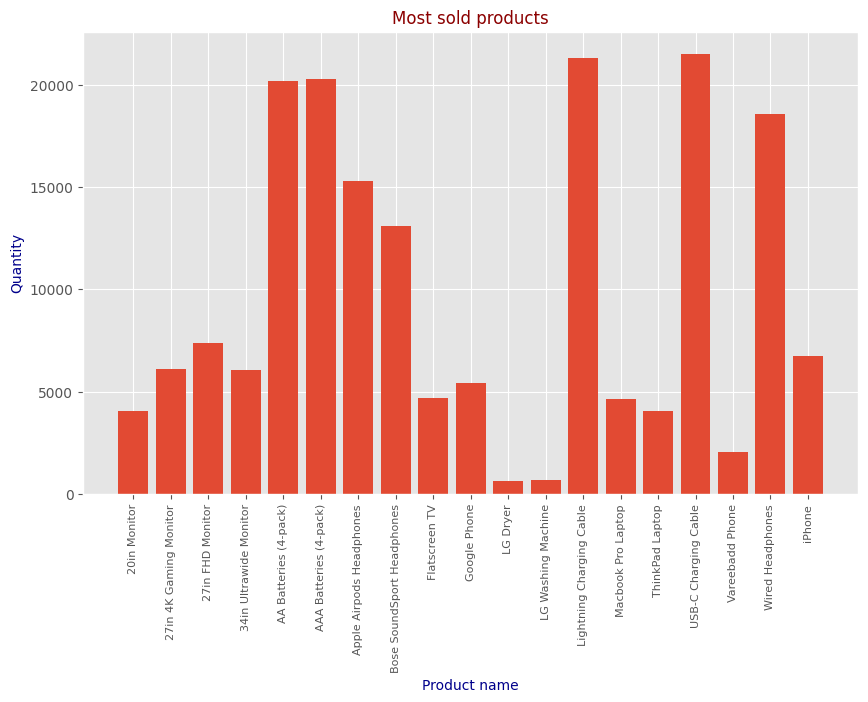

In [56]:
plt.figure(figsize=(10, 6))

product_group = df.groupby('product')

products = [product for product, df in product_group]

plt.bar(products, product_group.count()['quantity_ordered'])

plt.xticks(products, rotation='vertical', size=8)

plt.xlabel("Product name", color='darkblue', size=10)

plt.ylabel("Quantity", color='darkblue', size=10)

plt.title("Most sold products", color='darkred', size=12)
 

**Why AAA Batteries (4-pack) and AA Batteries (4-pack) sold more?**
- Lets compare prices to figure out why...

C:\Users\hp\AppData\Local\Temp\ipykernel_6824\1464845976.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


Text(0.5, 1.0, 'Most sold products with price')

<Figure size 1200x800 with 0 Axes>

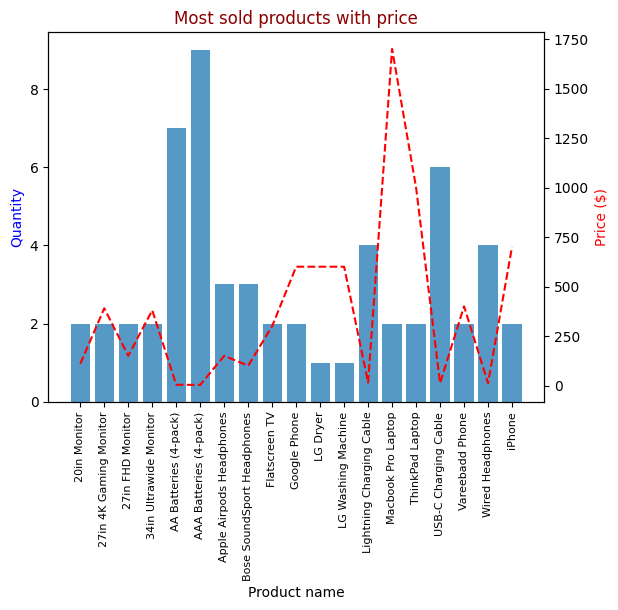

In [58]:
plt.figure(figsize=(12, 8))

plt.style.use('default')

prices = df.groupby('product').max()['price_each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, product_group.max()['quantity_ordered'], alpha=0.75)

ax2.plot(products, prices, 'r--')

ax1.set_xlabel('Product name', size=10)

ax1.set_ylabel('Quantity', color='b', size=10)

ax2.set_ylabel('Price ($)', color='r', size=10)

ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.title("Most sold products with price", color='darkred', size=12)
plt.savefig("./img/05_most_product_price", bbox_inches='tight', dpi=300)

[*Resources: Adding a y-axis label to secondary y-axis in matplotlib*](https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib)